# Logistic Regression using Gradient Descent




### <u>Introduction</u> 

In this blog post, I implement the Logistic Regression algorithm to linearly classify data. Unlike the Perceptron algorithm, which was implemented in blog post 1, the data does not have to be linearly separable for the LR algorithm to converge and provide an accurate weight vector, w, to separate our data.  
  
To implement this algorithm, we rely on Gradient Descent to perform most of the heavy lifting. Gradient Descent is an optimization algorithm which can be performed to minimize convex Empirical Loss functions. As implied in the name, gradient descent computes the <i>gradients</i> of our loss function and takes incremental steps towards an optimal weight vector.

### Implementation:  

<a href="https://github.com/johnny-kantaros/johnny-kantaros.github.io/blob/main/posts/Blog2-GD/LogisticRegression.py">See Source Code</a>

To implement my fit() algorithm, I followed these steps:  

1. Initialize w (weight vector) as random, X_ (padded input matrix)  
2. While there were more possible iterations AND no convergence reached:  
    1. Calculate new w using the gradient of the Log Loss  
    2. Calculate new loss using my empirical loss function
    3. Check if convergence has been reached  



### Experiments:  

In my following experiments, I test both my regular and stochastic gradient descent algorithm using both linearly separable and non-linearly separable data. As you will see, this algorithm is powerful and has the ability to quickly classify linearly separable data with 100% accuracy. Additionally, as mentioned above, this algorithm is superior to Perceptron, as it can still converge on non-linearly separable data. Finally, you will see how batch size affects convergence with stochastic gradient descent. 

#### Experiment 1: Fitting our Logistic Regression model on Linearly Seperable Data

First, we need to import numpy and my implementation class for logistic regression:

In [1]:
import numpy as np
from LogisticRegression import LogisticRegression

Next, lets create a batch of linearly separable data. In this case, linearly separable implies that a 2d line could separate our data cluster into two distinct groups. To make these blobs, we will utilize sklearn's `make_blobs` module. This data will be used to test our algorithm.

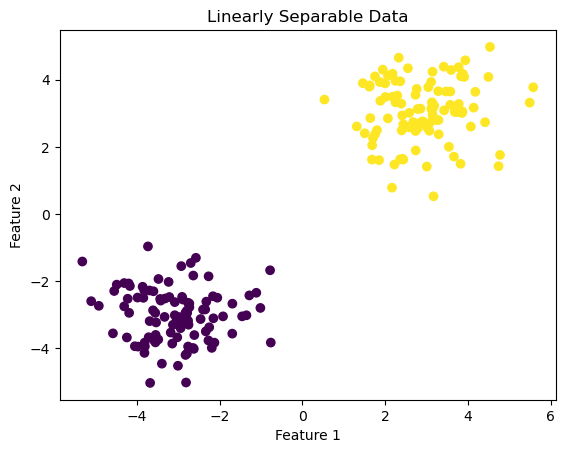

In [2]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-3, -3), (3, 3)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
title = plt.gca().set_title("Linearly Separable Data")


Now, we can create an instance of our logistic regression algorithm. To do this, we can call `LogisticRegression()` from our previously implemented class. Next, we can fit our algorithm using the linearly separable blob data:

In [3]:
# Make model object
LR = LogisticRegression()

# Fit the model (regular Gradient Descent)
# Parameters: 
# X (observations), 
# y (labels), 
# Alpha (learning rate), 
# Max_epochs (max steps)

LR.fit(X, y, .001)

After fitting our data, we can examine the model's outputs and accuracy:

In [4]:
w = LR.w
prev_losses = LR.loss_history[-10:]
accuracy = LR.score(X, y)

print("Weight vector:" , w)
print("Loss History (Last 10 values):", prev_losses)
print("Accuracy:", accuracy)


Weight vector: [1.02123758 0.918559   0.07719487]
Loss History (Last 10 values): [0.006189285889420821, 0.006188904213825039, 0.006188522588510359, 0.006188141013466678, 0.006187759488683866, 0.006187378014151779, 0.006186996589860317, 0.006186615215799372, 0.006186233891958806, 0.00618585261832852]
Accuracy: 1.0


Our model has 100% accuracy. This means the model perfectly separated the input data, which was expected. Now, lets visualize our data!

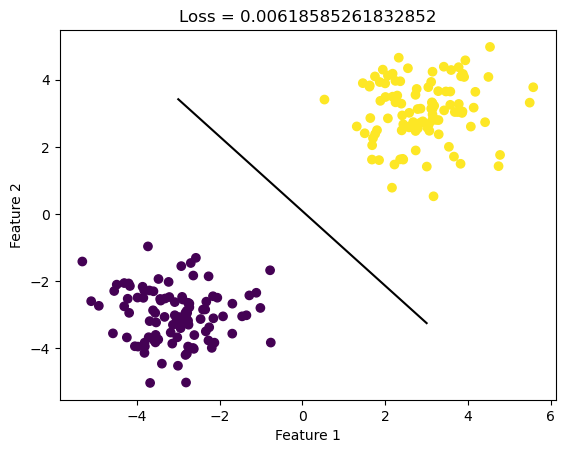

In [5]:
np.random.seed(123)

w = LR.w
loss = LR.loss_history[-1]

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)

p = plt.plot(f1, (w[2] - f1*w[0])/w[1], color = "black")
title = plt.gca().set_title(f"Loss = {loss}")

In this figure, we can see that the algorithm provides a weight vector which perfectly separates our data into two groups. This implies that our algorithm can indeed classify linearly separable data. Now, we can create a time series analysis of our gradient throughout the course of the fitting process. 

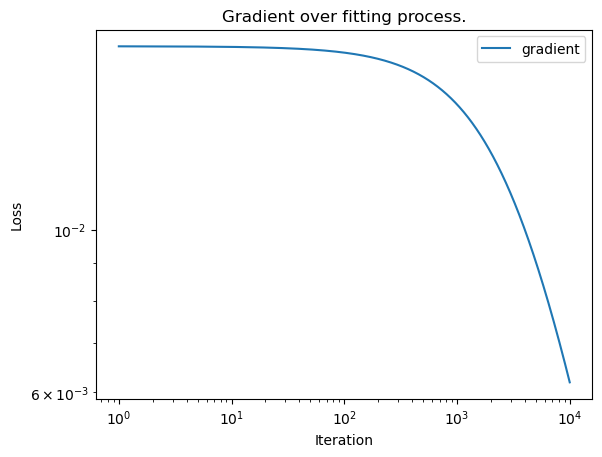

In [6]:
# Visualize gradient
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")
plt.title("Gradient over fitting process.")
plt.loglog()

xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")


legend = plt.legend()

As we can see, while the gradient decreases slow in the first few iterations, it really starts falling fast towards the end. The model stops after 1000 steps. Something to note in this diagram is that the gradient still seems to be converging. A large problem I faced in this project was having a linearly separable model fully converge. Although it will achieve 100% accuracy and be functional for all intensive purposes, the gradient takes an incredibly long time to fully converge (something like 27,000 steps). Even when it does "converge", it does not have the appealing shape as we will see in the next plot.

#### Experiment 2: Fitting our model on non-linear data:

Unlike the Perceptron model, our LR model should still converge on non-linearly separable data. Although the accuracy will not be 100%, we can still create a fairly accurate and dependable model. This can be important in applications where obtaining a high accuracy is still valuable, even if it's not perfect. 

To perform this experiment, we will again use the `make_blobs` module. This time, however, we will pick centers which force our data to overlap. By doing so, we can observe our algorithm's performance on non-linearly separable data.

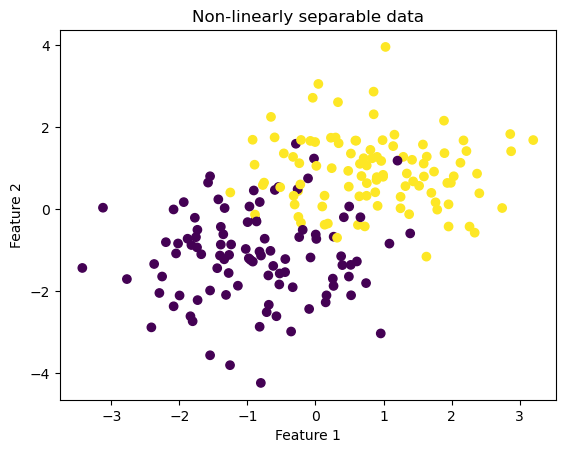

In [7]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
title = plt.gca().set_title("Non-linearly separable data")

Once again, we can fit our model and examine the accuracy:

In [8]:
LR = LogisticRegression()
LR.fit(X, y, .01)

In [9]:
w = LR.w
prev_losses = LR.loss_history[-10:]
accuracy = LR.score(X, y)

print("Weight vector:" , w)
print("Loss History (Last 10 values):", prev_losses)
print("Accuracy:", accuracy)

Weight vector: [1.44281892 1.75619129 0.0405471 ]
Loss History (Last 10 values): [0.22141524046882058, 0.22141299904135964, 0.2214107598360807, 0.22140852285039425, 0.22140628808171475, 0.22140405552746018, 0.221401825185052, 0.22139959705191528, 0.22139737112547875, 0.22139514740317448]
Accuracy: 0.895


Even though our model was not perfect, it still achieved an accuracy of 89%! In many contexts where 100% accuracy is not needed, this can be a very valuable model. To get a better understanding of the model's performance, lets visualize:

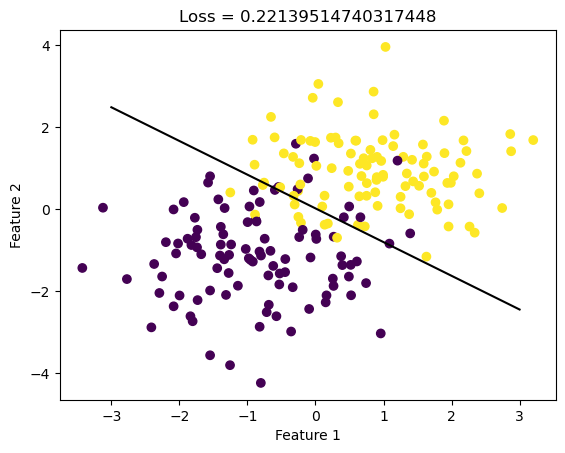

In [10]:

w = LR.w
loss = LR.loss_history[-1]

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

f1 = np.linspace(-3, 3, 101)

p = plt.plot(f1, (w[2] - f1*w[0])/w[1], color = "black")
title = plt.gca().set_title(f"Loss = {loss}")

From this visualization, we can see that our model does a good job of spitting the data. It is important to note that it is impossible to completely separate the data, so this is the best the algorithm can do. Once again, lets visualize the gradient over the fitting process for our algorithm.

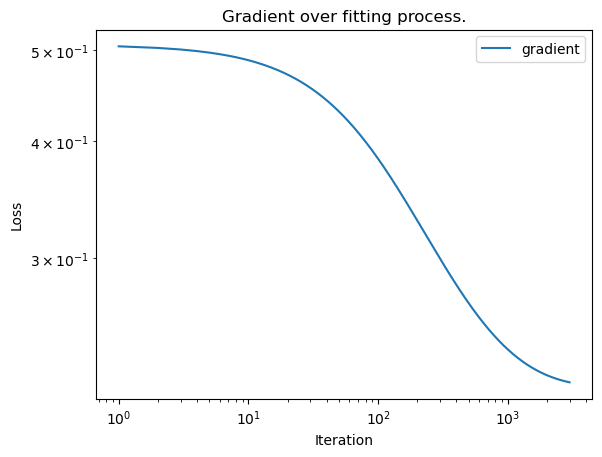

In [11]:
# Visualize gradient


num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()

plt.title("Gradient over fitting process.")
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")

Here, we see a clear visual demonstration of the model converging over time, represented by the concavity changing. 

#### Experiment 3: Choosing a learning rate that is too high:

Our next experiment will analyze the impact of setting the learning rate too high for our algorithm. When the learning rate is too high, the model may struggle to converge. Here is an illustration of the different impacts the learning rate can have:  

![Learning Rates](learning.png)  


As the picture shows, there is a sweet spot for choosing the learning rate. If the rate is too low, the model will struggle to converge. On the other hand, if the rate is too high, it will lead to unpredictable behavior and fail to converge. To perform this test, we will once again make sample data using blobs:

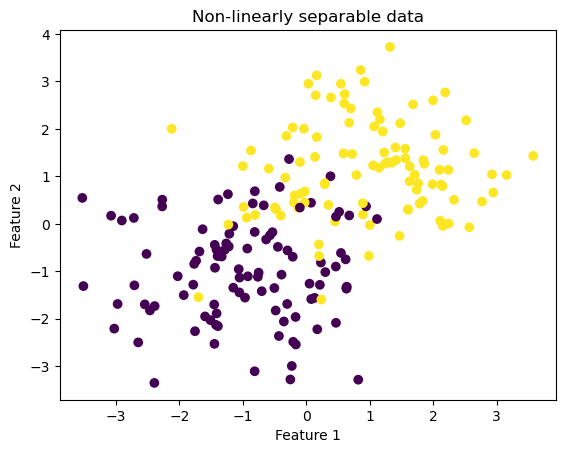

In [12]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

# make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

title = plt.gca().set_title("Non-linearly separable data")

Next, we can fit our data and examine the results. We will use a learning rate of 50, which is very high.

In [13]:
LR = LogisticRegression()
LR.fit(X, y, 50, 1000)

In [14]:
w = LR.w
prev_losses = LR.loss_history[-10:]
accuracy = LR.score(X, y)

print("Weight vector:" , w)
print("Loss History (Last 10 values):", prev_losses)
print("Accuracy:", accuracy)

Weight vector: [ 0.82359842  1.41773475 -0.11125376]
Loss History (Last 10 values): [0.5215487069929692, 0.3380265616582681, 0.27244564205307364, 0.42320201073334673, 0.8050801231974287, 1.1561323959909802, 0.552280563562024, 0.38739586285854827, 0.2680592916473756, 0.2587059064341709]
Accuracy: 0.885


Although the model produces a good accuracy, we can see that the loss history is fairly sporadic. To analyze this further, lets plot the gradient over time: 

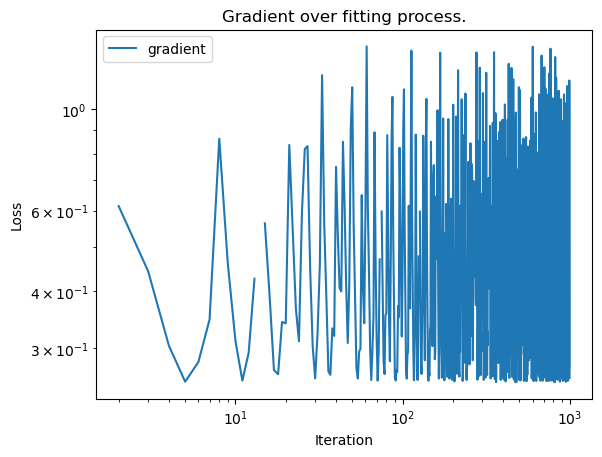

In [15]:
# Visualize gradient
num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()
plt.title("Gradient over fitting process.")
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")


Here, we can see the effects of choosing a learning rate that is too high. As we can see, the gradient is unpredictable and does not converge. Consequently, it is important to choose a learning rate that allows for convergence when initializing your model.

#### Experiment 4: Comparing Stochastic vs Regular gradient descent  

The next experiment we will consider is a case study of Stochastic vs Regular gradient descent. The main difference between the two is that Stochastic descent uses <i>batches</i> during its fitting process. The use of batching enables our model to be more efficient, and it allows for randomness in the data, which hopefully can avoid local minima and find the true minimums of the loss functions.  

First, we will create another instance of our logistic regression class, yet this time we will fit it using the stochastic fit method and plot its loss history. Next, we will do the same thing for normal gradient descent. By doing so, we can analyze how they compare.  

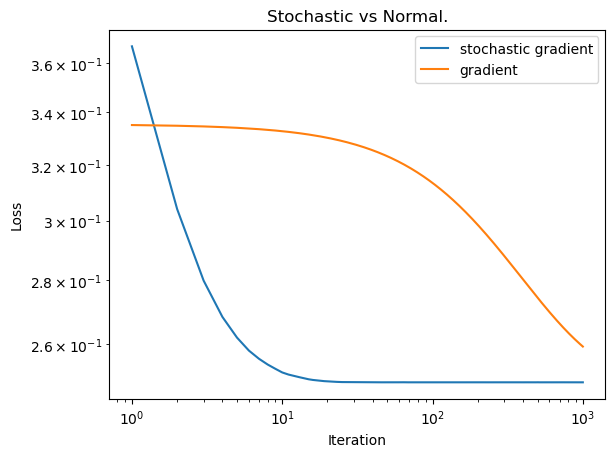

In [16]:

# Stochastic gradient descent
LR = LogisticRegression()
LR.fit_stochastic(X, y, 
                  max_epochs = 1000,  
                  batch_size = 10, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient")

# Regular gradient descent
LR = LogisticRegression()
LR.fit(X, y, alpha = .01, max_epochs = 1000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend()

plt.title("Stochastic vs Normal.")
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")

As we can see, stochastic gradient descent seems to produce a much better output than normal gradient descent. While normal gradient descent seems to eventually converge, stochastic gradient descent is far quicker in its convergence, which could be very important in machine learning applications.

#### Experiment 5: Batch size vs Convergence

The final experiment deals with optimizing batch size for stochastic gradient descent. Batch size can be important for efficiency and accuracy in this algorithm, so it is important to consider multiple values. To perform this experiment, we will fit two models, one with a small batch size, and another with a large batch size.

In [17]:
LR1 = LogisticRegression()
LR1.fit_stochastic(X, y, max_epochs = 1000, batch_size = 50, alpha = .1)

LR2 = LogisticRegression()
LR2.fit_stochastic(X, y, max_epochs = 1000, batch_size = 5, alpha = .1)

Next, we will show the corresponding convergence plots:

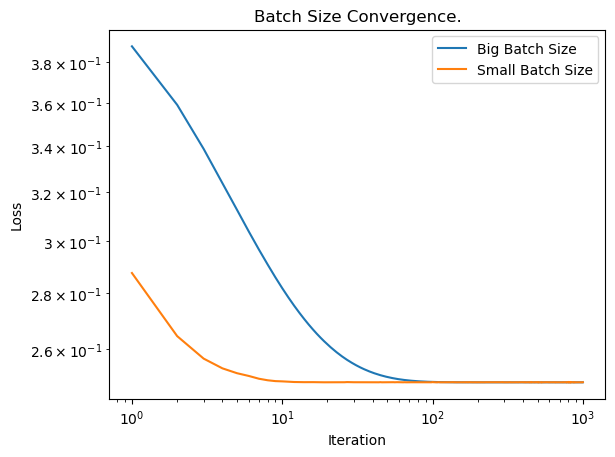

In [18]:
num_steps = len(LR1.loss_history)
plt.plot(np.arange(num_steps) + 1, LR1.loss_history, label = "Big Batch Size")

num_steps = len(LR2.loss_history)
plt.plot(np.arange(num_steps) + 1, LR2.loss_history, label = "Small Batch Size")

plt.loglog()

legend = plt.legend()
plt.title("Batch Size Convergence.")
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")

After running this experiment multiple times, it is evident that a smaller batch size leads to a quicker convergence than a larger batch size. This result is not intuitive, as one might expect a larger batch size to be more accurate. Additionally, the smaller batch size uses less data and is mode efficient, which will be important in big ML practices. 